In [2]:
import pandas as pd
import seaborn as sns
import requests
import numpy as np

In [3]:
df = pd.read_json("gme.json")
df2 = pd.read_json("recentGME.json")

In [4]:
df.drop(columns = 'Adj Close')

,Date,Open,High,Low,Close,Volume
0,2002-02-13,2.406250,2.515000,2.381250,2.512500,76216000
1,2002-02-14,2.543750,2.548750,2.481250,2.500000,11021600
2,2002-02-15,2.500000,2.506250,2.462500,2.487500,8389600
3,2002-02-19,2.475000,2.475000,2.343750,2.387500,7410400
4,2002-02-20,2.400000,2.468750,2.381250,2.468750,6892800
...,...,...,...,...,...,...
5595,2024-05-07,15.850000,17.290001,14.930000,16.309999,24308600
5596,2024-05-08,16.049999,17.240000,15.330000,15.920000,24775100
5597,2024-05-09,15.900000,18.510000,15.350000,18.010000,25759300
5598,2024-05-10,17.930000,20.200001,16.879999,17.459999,36831900


In [5]:
pd.concat([df, df2])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800
...,...,...,...,...,...,...,...
89,2024-09-20,19.63000,22.03000,19.48200,21.85000,NaN,60804837
90,2024-09-23,21.54000,22.56000,21.23010,22.31000,NaN,13945783
91,2024-09-24,22.61000,22.72000,21.54000,22.63000,NaN,12112487
92,2024-09-25,22.16000,22.83000,22.06500,22.18000,NaN,6137420


In [6]:
url = "https://api.polygon.io/v1/open-close/AMC/2023-08-23?adjusted=false&apiKey=aRKWap5pp8RZMnZ6rUKUlaiDLK_ud_oH"
r = requests.get(url)
df3 = r.json()
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0    2002-02-13   2.406250   2.515000   2.381250   2.512500   1.691666   
1    2002-02-14   2.543750   2.548750   2.481250   2.500000   1.683250   
2    2002-02-15   2.500000   2.506250   2.462500   2.487500   1.674834   
3    2002-02-19   2.475000   2.475000   2.343750   2.387500   1.607504   
4    2002-02-20   2.400000   2.468750   2.381250   2.468750   1.662210   
...         ...        ...        ...        ...        ...        ...   
5595 2024-05-07  15.850000  17.290001  14.930000  16.309999  16.309999   
5596 2024-05-08  16.049999  17.240000  15.330000  15.920000  15.920000   
5597 2024-05-09  15.900000  18.510000  15.350000  18.010000  18.010000   
5598 2024-05-10  17.930000  20.200001  16.879999  17.459999  17.459999   
5599 2024-05-13  26.340000  38.200001  24.770000  30.450001  30.450001   

         Volume  
0      76216000  
1      11021600  
2       8389600  
3       7410400  
4       6892800  
...

In [7]:
response = requests.get(url)

In [8]:
data = response.json()

In [9]:
df3 = pd.DataFrame([data])

In [10]:
df3.head()

,status,from,symbol,open,high,low,close,volume,afterHours,preMarket
0,OK,2023-08-23,AMC,1.95,2.2,1.94,1.96,199854360.0,1.98,2.47


<AxesSubplot:xlabel='high', ylabel='volume'>

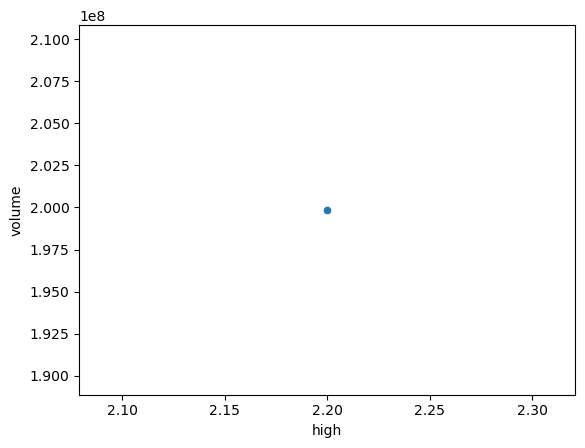

In [11]:
sns.scatterplot(data=df3, x="high", y="volume")

In [12]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import time

In [13]:
def gather_data(start, end):
    
    data = {
        "Date": [], "Open": [], "High": [], "Low": [], "Close": [], "Volume": []
    }

In [14]:
current_date = pd.to_datetime(start)
end_date = pd.to_datetime(end)
while current_date <= end_date:
    date_str = current_date.strftime('%Y-%m-%d')
url = "https://api.polygon.io/v1/open-close/AMC/2023-08-23?adjusted=false&apiKey=aRKWap5pp8RZMnZ6rUKUlaiDLK_ud_oH"
response = requests.get(url)
if response.status_code == 200:
    json_data = response.json()
    data["Date"].append(current_date)
    data["Open"].append(json_data['open'])
    data["High"].append(json_data['high'])
    data["Low"].append(json_data['low'])
    data["Close"].append(json_data['close'])
    data["Volume"].append(json_data['volume'])
    else:
        print("Bad Request")
    current_date += timedelta(days=1)
    time.sleep(60)
    current_date += timedelta(days=1)
    return pd.DataFrame(data)

SyntaxError: invalid syntax (3193735291.py, line 15)

In [ ]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import time

def gather_data(start, end):
    data = {
        "Date": [], "Open": [], "High": [], "Low": [], "Close": [], "Volume": []
    }
    
    current_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    while current_date <= end_date:
        date_str = current_date.strftime('%Y-%m-%d')
        url = f"https://api.polygon.io/v1/open-close/AMC/{date_str}?adjusted=false&apiKey=aRKWap5pp8RZMnZ6rUKUlaiDLK_ud_oH"
        
        response = requests.get(url)
        
        if response.status_code == 200:
            json_data = response.json()
            data["Date"].append(current_date)
            data["Open"].append(json_data['open'])
            data["High"].append(json_data['high'])
            data["Low"].append(json_data['low'])
            data["Close"].append(json_data['close'])
            data["Volume"].append(json_data['volume'])
        else:
            print(f"Bad Request for {date_str}: {response.status_code}")
        
        current_date += timedelta(days=1)
        time.sleep(60)  # Sleep for 60 seconds to avoid hitting rate limits
    
    return pd.DataFrame(data)

# Example usage
# df = gather_data('2023-08-20', '2023-08-23')
# print(df)


In [15]:
df4 = pd.read_json("light_encode_wsb.json")
df5 = pd.read_json("raw_wsb.json")

In [17]:
df4.head()

,label,timestamp,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710


In [18]:
df5.head()

,timestamp,score,comms_num
0,2020-09-29,4,11
1,2021-01-28,1149849,170206
2,2021-01-29,6410329,821915
3,2021-01-30,6576878,734451
4,2021-01-31,4911452,288004


In [19]:
merged_amc = pd.merge(wsb, amc_wsb, how="inner", on="Date")
merged_amc.columns()

NameError: name 'wsb' is not defined

In [22]:
# Assuming df4 and df5 are your DataFrames
merged_amc = pd.merge(df4, df5, how="inner", left_on="timestamp", right_on="timestamp")
merged_amc.head()


,label,timestamp,score_x,comms_num_x,score_y,comms_num_y
0,AMC,2021-01-28,38408,6027,1149849,170206
1,Both,2021-01-28,733,208,1149849,170206
2,GME,2021-01-28,268078,26332,1149849,170206
3,Other,2021-01-28,842630,137639,1149849,170206
4,AMC,2021-01-29,22404,7023,6410329,821915


<AxesSubplot:xlabel='comms_num_y', ylabel='score_y'>

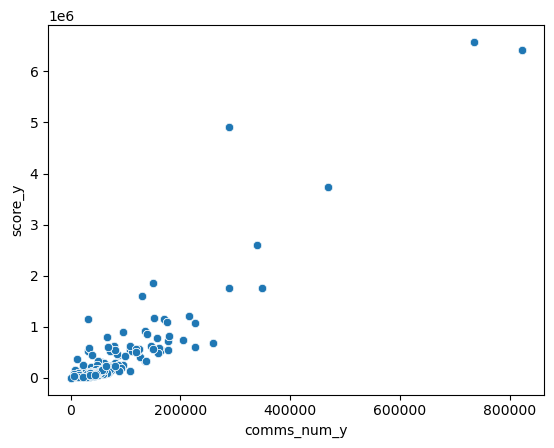

In [23]:
sns.scatterplot(data=merged_amc, x="comms_num_y", y="score_y")

# Higher comms = higher score